<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Python_Minicurso/blob/main/Cuadernos_Jupyter/Intro_Python_fit_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <h1><b><center>Introducción al Aprendizaje Automático</center></b></h1>


# <h1><b><center>Primer Ejemplo: Regresión Lineal Simple</center></b></h1>


# <h2><center>Mario I. Caicedo</center></h2>


El problema de regresión lineal simple -probablemente el problema más sencillo de **aprendizaje supervisado**- consiste en encontrar los parámetros (pendiente e intercepto de una recta) que permitan hacer **la mejor** predicción (extrapolación) posible a datos que provengan de dos atributos que se visualizan alineados en un gráfico cruzado.  

Este es un problema totalmente resuelto en estadística clásica, lo que de ninguna manera disminuye el interés que pueda despertar y es por ello que este cuaderno describe su solución de manera exhaustiva.

------------------------------------------------

* El objetivo de este cuaderno consiste en presentar la solución al problema de ajuste lineal simple de manera exhaustiva y pedagógica. 

* De acuerdo al objetivo, se destacarán las matemáticas que están detrás del proceso.

* El problema se presentará en cuatro formas distintas. 
    * En dos de ellas el apoyo en bibliotecas será mínimo (solo recurriremos al cálculo de transpuestas e inversas de matrices).
    * En las otras dos utilizaremos **sklearn**, una biblioteca estándar de machine learning (*ML*).  

### **Bibliotecas**

In [ ]:
import numpy as np
import scipy 
import pandas as pd

from scipy import stats
from scipy import linalg

import sklearn

from sklearn.linear_model import LinearRegression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib as plt
import matplotlib.pyplot as plt

# **Introducción**

* El problema de interés comienza por un conjunto de datos experimentales que vienen dados de a pares 

$$(x_1,y_1)\,,(x_2,y_2)\,,...,(x_N,y_N)$$ 

* Típicamente, los valores $y_i$ han sido medidos con algún error y al hacer un gŕafico $y$ vs $x$ encontramos que parece haber una relación del tipo

$$y=ax+b$$

* En la notación estándar de *problemas inversos*, se tienen $N$ **mediciones (datos)** $d^{(i)}$ ($d\approx{}y$), correspondientes a un muestreo ($x^{i}$) de la variable indpendiente $f\approx{}x$ y parámetros $m$ y $n$ en la forma,

$$\boxed{d^{(i)}=m\,x^{(i)}+n+\varepsilon^{(i)}\,,\qquad\,i=1,2,...,N}$$

* Los valores $\varepsilon^{(i)}$ son las incertdumbres en las mediciones de tiempo y posición

* En la notación estándar de estadística y ML (ver Andrew Ng) 

$$\boxed{y^{(i)}=h_{\Theta}(x^{(i)})=\theta_0+\theta_1\,x^{(i)}+\varepsilon^{(i)}}$$
donde $h_\Theta$ es la *hipótesis*

* Es importante notar que las relaciones entre las mediciones (datos observados) y los parámetros se pueden reescribir en las formas alternativas

$$\boxed{y^{(i)}=h_\Theta(x^{(i)})}$$

$$\boxed{\mathbf{d}^{(obs)}=\mathbf{Fm}\qquad\mathbf{y}^{(obs)}=\mathbf{F\Theta}}$$

* Donde $\mathbf{d}^{(obs)}$ ($\mathbf{y}^{(obs)}$) es el vector de los datos observados (de $N$ entradas), $\mathbf{F}$ una matriz $N\times{}2$, y

$$\Theta=\mathbf{m}=\begin{pmatrix}n\\m\end{pmatrix}=\begin{pmatrix}\theta_0\\\theta_1\end{pmatrix}$$

* **El problema de ajuste (ó *aprendizaje*) consiste en encontrar el vector de parámetros $\Theta$**

* Una vez que se alcanza el **aprendizaje**, es decir, se encontraron valores para $m$ y $n$, estos valores (parámetros) se pueden utilizar junto con la hipótesis para llevar a cabo predecciones (extrapolaciones)  

* Para resolver el problema se introduce un problema de minimización.

* La función de costo (error cuadrático medio) es:

$$J(\mathbf{m})=(\mathbf{d}^{(obs)}-\mathbf{Fm})^T(\mathbf{d}^{(obs)}-\mathbf{Fm})$$

* La solución al problema de aprendizaje se reduce a  minimizar la función de costo con respecto a lo parámetos.

* Se puede encontrar una solución directa buscando los puntos críticos de $J$, esto es, resolviendo

$$\nabla_{\mathbf{m}^T}J=0\,,$$
que resulta en
$$\boxed{\mathbf{m}=(\mathbf{F}^T\mathbf{F})^{-1}\,\mathbf{F}^T
\mathbf{d}^{(obs)}}$$

* Esta solución explítica requiere el cálculo de la inversa de la matriz $\mathbf{F}^T\mathbf{F}$ que en este caso es un problema casi trivial, pero que en el caso de un modelo lineal con $p$ parámetros puede complicarse por un conjunto de problemas bien conocidos en la subdisciplina del álgebra lineal numérica como por ejemplo
    * Largos tiempos de cálculo para problemas muy grandes y
    * Mal condicionamiento de la matriz $\mathbf{F}^T\mathbf{F}$

* El problema de aprendizaje también puede resolverse minimizando la función de costo a través de la técnica de **Descenso por Gradiente**.


# En este cuaderno resolveremos el problema de aprendizaje con un conjunto único de **datos sintéticos**.

* Los datos sintéticos corresponden a un movimiento de velocidad constante
* $x(t)=v_0\,t+x_0$

# **Parte III**

### Creación de los datos sintéticos

### La función hipotesis calcula los valores de x(t) a partir de una lista de tiempos generada con linspace.

In [ ]:
def hipotesis(t,Theta,porcentaje_ruido):
  np.random.seed(42)
  factor=porcentaje_ruido/100
  noise=factor*np.random.normal(size=21)
  h=Theta[0]+Theta[1]*t+noise
  return(h)

### Creación de los datos sintéticos

En una aplicación real, los datos deberían leerse

In [ ]:
t=np.linspace(0,10,21)
v0=-1.41
x0=0.57

Theta=np.zeros(2)
Theta[0]=x0
Theta[1]=v0

porcentaje_ruido=10.

x=hipotesis(t,Theta,porcentaje_ruido)

### Visualización de los datos sintéticos

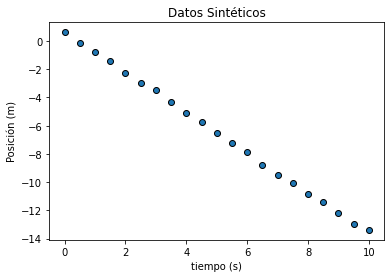

In [ ]:
fig, dx = plt.subplots()
dx.scatter(t, x, edgecolors=(0, 0, 0))

plt.title('Datos Sintéticos')
dx.set_xlabel('tiempo (s)')
dx.set_ylabel('Posición (m)')
plt.show()

# **Parte II**

### Soluciones sin recurrir a bibliotecas

------------------------------------------------------------

# Primer ajuste

## Solución analítica

* Resolver el sistema:
$$
\mathbf{F}^T\mathbf{F}\boldsymbol{\Theta}=\mathbf{F}^T\mathbf{d}^{(obs)}
$$

* Donde $\mathbf{F}$ es la matriz de tiempos
$$\mathbf{F}=\begin{pmatrix}1&t^{(1)}\\
1&t^{(2)}\\\vdots&\vdots\\1&t^{(N)}\end{pmatrix}$$


### Paso 1: Construcción y Transposición de

$$\mathbf{F}$$

### Paso 2: Cálculo de $$\mathbf{F}^T\mathbf{F}$$
 



In [ ]:
F=np.zeros((21,2))

for p in range(0,21):
  F[p,0]=1.
  F[p,1]=t[p]

FT=F.T # Transposición de M
FTF= FT.dot(F)

### Paso 3: Solución (aprendizaje) analítica/directa

$$\boxed{\boldsymbol{\Theta}=(\mathbf{F}^T\mathbf{F})^{-1}\,\mathbf{F}^T\mathbf{d}^{(obs)}}$$

* En este caso $\mathbf{F}$ es una matriz $2\times{}2$ simétrica y el cálculo de su inversa es elemental,
$$
\begin{pmatrix}
a&b\\
b&d
\end{pmatrix}^{-1}=\frac{1}{\Delta}\begin{pmatrix}
d&-b\\
-b&a
\end{pmatrix}\,,
$$
donde $\Delta$ el determinante tiene valor
$$
\Delta=ad-b^2$$

### Paso 3a: Construción de
$$(\mathbf{F}^T\mathbf{F})^{-1}$$

In [ ]:
FTF_inv=np.empty_like(FTF)

FTF_inv[0,0]=FTF[1,1]
FTF_inv[0,1]=-FTF[0,1]
FTF_inv[1,0]=-FTF[1,0]
FTF_inv[1,1]=FTF[0,0]
DELTA=FTF_inv[0,0]*FTF_inv[1,1]-FTF_inv[0,1]*FTF_inv[1,0]
DELTA=1./DELTA
FTF_inv=DELTA*FTF_inv

### Paso 3b: Construción del lado derecho del sistema:
$$\mathbf{F}^T\mathbf{d}^{(obs)}$$

### Paso 3d: Solución
$$\boxed{\boldsymbol{\Theta}=(\mathbf{F}^T\mathbf{F})^{-1}\,\mathbf{F}^T\mathbf{d}^{(obs)}}$$

In [ ]:
G=FT.dot(x) # Lado derecho del sistema

model_hand=FTF_inv.dot(G) # Solución

### Solución uando linalg (para dar un ejemplo de comparación)

* linalg usa técnicas avanzadas de álgebra lineal numeŕica para resolver el sistema de ecuaciones, su uso es totalmente innecesario en este caso pero se incluye para propóistos pedagógicos.


In [ ]:
model=linalg.inv(FTF).dot(G)

### Resultados

In [ ]:
print('Pendiente del Modelo Sintético:',Theta[1],'\n')

print('Intercepto del Modelo Sintético:',Theta[0],'\n')### Salida

print('Aprendizaje por via de la Solución Analítica\n')

print('Pendiente:',model_hand[1],'\n')

print('Intercepto:',model_hand[0],'\n')

print('Aprendizaje por via de la Solución Analítica usando linalg\n')

print('Pendiente:',model[1],'\n')

print('Intercepto:',model[0])

Pendiente del Modelo Sintético: -1.41 

Intercepto del Modelo Sintético: 0.57 

Aprendizaje por via de la Solución Analítica

Pendiente: -1.4229457377529424 

Intercepto: 0.6253938199079734 

Aprendizaje por via de la Solución Analítica usando linalg

Pendiente: -1.4229457377529433 

Intercepto: 0.6253938199079769


------------------------------------------------------------

# Segundo Ajuste 

## Aprendizaje por método de gradiente

### Paso 1: Funciones

* Función de costo/loss (será necesaria en el criterio de parada del algoritmo)

$$J(\boldsymbol{\Theta})=(\mathbf{d}^{(obs)}-\mathbf{F}\boldsymbol{\Theta})^T(\mathbf{d}^{(obs)}-\mathbf{Fm})$$

In [ ]:
def Cost(d,t,Theta,porcentaje_ruido):
  N=2.*float(len(t))
  s=d-hipotesis(t,Theta,porcentaje_ruido)
  c=s.dot(s.T)/N
  return(c)

* El gradiente de $J$ 

$$\nabla_{\boldsymbol{\Theta}^T}J(\boldsymbol{\Theta})=-\mathbf{F}^T(\mathbf{d}^{(obs)}-\mathbf{F}\boldsymbol{\Theta})$$

In [ ]:
def grad(d,F,Theta):
  M=F.T
  s=d-F.dot(Theta)
  gr=-M.dot(s)/float(len(d))
  return(gr)

In [ ]:
print(grad(x,F,Theta))

[0.00933487 0.16534361]


### Función para el **Algoritmo de Descenso por Gradiente**

* El algoritmo comienza dando una semilla (valor inicial) $\boldsymbol{\Theta}^{(0)}$

* A partir de la semilla se itera (el superíndice k indica la iteración) para conseguir nuevos valores de los parámetros

$$\boldsymbol{\Theta}^{(k+1)}=\boldsymbol{\Theta}^{(k)}-\mu\nabla_{\boldsymbol{\Theta}^T}J(\boldsymbol{\Theta}^{(k)})$$

* La iteración se detiende con algún criterio.
* El criterio que estamos usando es la estabilización de la función de costo.

In [ ]:
def descenso(Cost,grad,x,t,F,theta_ini,mu,criterio,N_max): # Tasa de aprendizaje, valor recomendado 0.05

  theta=theta_ini
  theta_history = theta
  cost_history = Cost(x,t,theta,0.) #obj_func(w,extra_param)
  delta_theta = np.zeros(theta.shape)
  n_iter= 1000
  c=1.0e3 # c es una valor para comparar con criterio

  while c > criterio and n_iter<N_max:
      
      Gradiente=grad(x,F,theta)
      delta_theta=-mu*Gradiente
      theta=theta+delta_theta
      
      # Almacenar la  evolución de theta y loss
      theta_history = np.vstack((theta_history,theta))
      cost_history = np.vstack((cost_history,Cost(x,t,theta,0.)))
        
        # update de n_iter y comparación e valores de Loss
      n_iter+=1
      #print(n_iter)
      c = np.absolute(cost_history[-1]-cost_history[-2])
    
  return(n_iter,theta_history,cost_history)
  #return(cost_history)
  print(n_iter)
  #return(theta_history)


### Paso 2: Aplicación del algoritmo al aprendizaje con los datos sintéticos

### Paso 2a: Semilla de los parámetros, tasa de aprenmdizaje y criterio de parada.

In [ ]:
Theta_ini=np.zeros(2)
Theta_ini[0]=2.
Theta_ini[1]=2.

mu=0.005 #tasa_de_aprendizaje
criterio=1e-05
N_it=50000

### Paso 2b: Llamada al algoritmo de descenso

In [ ]:
solucion=descenso(Cost,grad,x,t,F,Theta_ini,mu,criterio,N_it)

### Paso 3: Salida

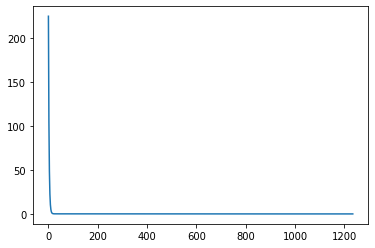

In [ ]:
import matplotlib.pyplot as plt

ss=solucion[2]
plt.plot(ss)
plt.show()

In [ ]:
print('Pendiente e Intercepto de los datos sintéticos:',Theta[1],Theta[0],'\n')

e_pendiente=np.abs(Theta[1]-solucion[1][-1][1])
e_intercepto=np.abs(Theta[0]-solucion[1][-1][0])


print('Solución luego de ',solucion[0],' Épocas (iteraciones)','\n')

print('Pendiente:',solucion[1][-1][1],'Error',e_pendiente,'\n')
print('Intercepto:',solucion[1][-1][0],'Error',e_intercepto,'\n')


Pendiente e Intercepto de los datos sintéticos: -1.41 0.57 

Solución luego de  2234  Épocas (iteraciones) 

Pendiente: -1.4477545673801815 Error 0.03775456738018157 

Intercepto: 0.7936177396267649 Error 0.2236177396267649 



___________________________________________________________


# **Parte III**

### Uso de Bibliotecas

# Tercer Ajuste

* Solución analítica

* Uso de la función *linregress*, de stats de scipy.

Pendiente: -1.422946 

Intercepto: 0.625394 

R^2: 0.999568,



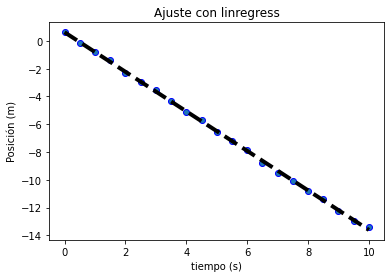

In [ ]:
pos = stats.linregress(t,x)

t_min=t[0]
t_max=t[len(t)-1]


print(f"Pendiente: {pos.slope:.6f}",'\n')

print(f"Intercepto: {pos.intercept:.6f}",'\n')

print(f"R^2: {pos.rvalue**2:.6f},\n")


fig, ax = plt.subplots()
ax.scatter(t, x, edgecolors=(0, 0, 1))
#ax.plot([0.,10.], [v0*t_min+x0,v0*t_max+x0], 'k--', lw=4)
ax.plot([0.,10.], [pos.slope*t_min+pos.intercept,pos.slope*t_max+pos.intercept], 'k--', lw=4)
plt.title('Ajuste con linregress')
ax.set_xlabel('tiempo (s)')
ax.set_ylabel('Posición (m)')
plt.show()

___________________________________________________________

# Cuarto Ajuste

* Biblioteca de ML *sklearn*
* sklearntiene dos funcionalidades para llevar a cabo el ajuste.
* Ambas funcionalidades requieren un reordenamiento de los datos

* Reordenamiento

In [ ]:
tr=t.reshape(-1,1)
xr=x.reshape(-1,1)

### Primer enfoque

In [ ]:
reg_1 = LinearRegression().fit(tr,xr)

pendiente=reg_1.coef_[0][0]

intercepto=reg_1.intercept_[0]

print('Pendiente',pendiente,'\n')

print('Intercepto',intercepto,'\n')

print('R^2',reg_1.score(tr,xr))

Pendiente -1.422945737752943 

Intercepto 0.6253938199079778 

R^2 0.9995682055181315


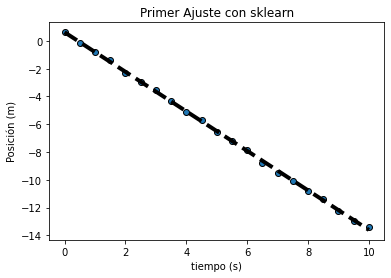

In [ ]:
fig, bx = plt.subplots()
bx.scatter(tr, xr, edgecolors=(0, 0, 0))
bx.plot([0.,10.], [pendiente*t_min+intercepto,pendiente*t_max+intercepto], 'k--', lw=4)
plt.title('Primer Ajuste con sklearn')
bx.set_xlabel('tiempo (s)')
bx.set_ylabel('Posición (m)')
plt.show()

* Predicciones (extrapolaciones)

In [ ]:
t_new=np.array([0.0,0.5,1.0])
t_new=t_new.reshape(-1,1)
extrapolacion=reg_1.predict(t_new)
print(extrapolacion)

[[ 0.62539382]
 [-0.08607905]
 [-0.79755192]]


### Segundo enfoque (sklearn.sklearn.linear_model)

* Definición de los conjuntos de entrenamiento y prueba

In [ ]:
t_train=tr[:-10] # esto toma los primeros 11 elementos de t
t_test = tr[-10:] # esto toma el resto de la lista

x_train=xr[:-10]
x_test=xr[-10:]

* Modelo

In [ ]:
regr = linear_model.LinearRegression()

# Entrenamiento

regr.fit(t_train,x_train)

# Predicciones

x_predict = regr.predict(t_test)


* Salida

In [ ]:
print('Pendiente: \n', regr.coef_,'\n')

print('Intercepto: \n', regr.intercept_,'\n')

print('Error (incertidumbre) cuadrática media: %.2f'
      % mean_squared_error(x_test, x_predict),'\n')

# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f'
      % r2_score(x_test, x_predict))

Pendiente: 
 [[-1.41932123]] 

Intercepto: 
 [0.62982301] 

Error (incertidumbre) cuadrática media: 0.01 

Coeficiente de determinación: 1.00


__________________________________________________________________

 * Ejemplos (A FUTURO)

 https://www.scribbr.com/statistics/simple-linear-regression/


 https://towardsdatascience.com/linear-regression-with-example-8daf6205bd49